# Importing Libraries

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [6]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [7]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [9]:
start_date=datetime.datetime(2023,12,1)
enddate=datetime.datetime.today()

In [10]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [11]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [12]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [13]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [14]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [15]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [16]:
holding=Binance.get_inventory()

In [17]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,4813.162980,0.9999,-131.886217,2628.22,2496.333783
OMUSDT,526.319895,2853.383603,0.5928,0.000000,2327.06,2327.060000
BTCUSDT,601.021649,899.079934,0.1868,3.537078,298.06,301.597078
SOLUSDT,281.200518,388.633579,0.0807,0.000000,107.43,107.430000
JASMYUSDT,387.458505,337.220892,0.0701,0.000000,-50.24,-50.240000
ETHUSDT,250.747339,199.411343,0.0414,0.000000,-51.34,-51.340000
TRXUSDT,76.868953,111.251010,0.0231,-10.723889,34.38,23.656111
BBUSDT,60.176053,23.131103,0.0048,-39.733101,-37.04,-76.773101
BNBUSDT,1.142121,1.051514,0.0002,-10.606040,-0.09,-10.696040
PEPEUSDT,0.000004,0.000003,0.0000,-38.521986,-0.00,-38.521986


In [18]:
days=(enddate-start_date).days
remaining=days%500
numbers_of_table=days//500
remaining

431

In [19]:
# data1=Binance.get_price(tickers,start_date)
# data2=Binance.get_price(tickers,enddate)
# data=data1.combine_first(data2)
# data.index=pd.to_datetime(data.index)
# #data=data.dropna(axis=1)
# n=len(data.columns)
# data=data.sort_index()

In [20]:
temp_end=start_date
prices=pd.DataFrame()
for i in range(numbers_of_table+1):
    temp_data=Binance.get_price(tickers,temp_end)
    temp_end=temp_end+datetime.timedelta(500)
    prices=prices.combine_first(temp_data)
    
temp_end=temp_end+datetime.timedelta(500)
last_data=Binance.get_price(tickers,temp_end)
data=prices.combine_first(last_data)
data=data.sort_index()
data = data[~data.index.duplicated(keep='first')]

In [21]:
data.index=pd.to_datetime(data.index)
n=len(data.columns)
data=data.sort_index()

In [22]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [23]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [24]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [26]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [27]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [28]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])
price_pnl.index=pd.to_datetime(price_pnl.index)

In [29]:
# pnl_history=pd.DataFrame()
# pnl_history.index=quantities.index
# pnl_history=pnl_history.sort_index()

# for col in quantities:
    
#     pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost.iloc[-1][col])

# pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [30]:
# pnl_history['Total']-pnl_history['Total'].shift(1)

In [31]:
# pnl_history['Total']


In [32]:
daily_book_cost=book_cost.resample("D").last().dropna().sort_index()

In [33]:
book_cost_history=pd.DataFrame()
book_cost_history.index=set(daily_book_cost.index.append(quantities.index))

book_cost_history=book_cost_history.sort_index()

for col in quantities:
    
    book_cost_history[col]=daily_book_cost[col]

book_cost_history=book_cost_history.ffill()
book_cost_history=book_cost_history.loc[quantities.index]

In [34]:
#realized_pnl_time=realized_pnl_time.resample("D").last().dropna().sort_index()

#pd.DataFrame(realized_pnl_time)

In [35]:
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()

for col in quantities:
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [36]:
pnl_history['Total']

2024-09-23    -374.733177
2024-09-24    -351.229838
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-01-29    1856.722021
2025-01-30    2444.042843
2025-01-31    2280.510081
2025-02-01    2121.973187
2025-02-02    1872.990523
Name: Total, Length: 133, dtype: float64

In [37]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24     23.503339
2024-09-25    -11.102127
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-01-29    111.099918
2025-01-30    587.320822
2025-01-31   -163.532763
2025-02-01   -158.536893
2025-02-02   -248.982664
Name: Total, Length: 133, dtype: float64

In [38]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [39]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [40]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [41]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\niroo\AppData\Local\Temp\ipykernel_143696\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [42]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [43]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [44]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

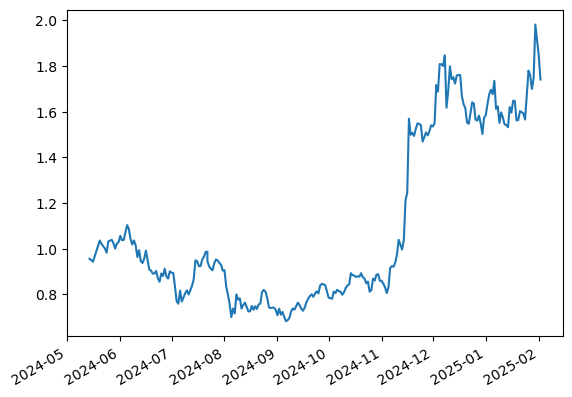

In [45]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [47]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [50]:
days=0
historical_risk=RiskAnalysis(returns_to_use.iloc[-days:])
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[-days:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [51]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [54]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.4805
XRPUSDT,0.1671
BNBUSDT,0.1484
DEXEUSDT,0.0735
SUIUSDT,0.0562
PEPEUSDT,0.0412
RAYUSDT,0.0259
AAVEUSDT,0.0072
HBARUSDT,0.0000
TRXUSDT,0.0000


In [55]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.441437
BTCUSDT,0.300000
XRPUSDT,0.112294
DEXEUSDT,0.065912
SUIUSDT,0.039274
BNBUSDT,0.023284
RAYUSDT,0.012976
PEPEUSDT,0.004823


### Current results

In [57]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [58]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
OMUSDT,0.518453
BTCUSDT,0.393335
TRXUSDT,0.088212


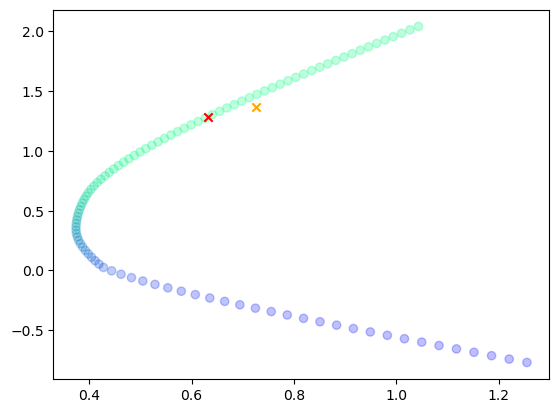

In [59]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [61]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison=current_holding_comparison.round(7)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2853.383603,0.592829,0.518453,0.074376
BTCUSDT,899.079934,0.186796,0.393335,-0.206539
SOLUSDT,388.633579,0.080744,0.000000,0.080744
JASMYUSDT,337.220892,0.070062,0.000000,0.070062
ETHUSDT,199.411343,0.041430,0.000000,0.041430
TRXUSDT,111.251010,0.023114,0.088212,-0.065098
BBUSDT,23.131103,0.004806,0.000000,0.004806
BNBUSDT,1.051514,0.000218,0.000000,0.000218
PEPEUSDT,0.000003,0.000000,0.000000,0.000000


In [62]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison=historical_comparison.fillna(0)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison=historical_comparison.round(7)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2853.383603,0.592829,0.441437,0.151392
BTCUSDT,899.079934,0.186796,0.300000,-0.113204
SOLUSDT,388.633579,0.080744,0.000000,0.080744
JASMYUSDT,337.220892,0.070062,0.000000,0.070062
ETHUSDT,199.411343,0.041430,0.000000,0.041430
TRXUSDT,111.251010,0.023114,0.000000,0.023114
BBUSDT,23.131103,0.004806,0.000000,0.004806
BNBUSDT,1.051514,0.000218,0.023284,-0.023065
PEPEUSDT,0.000003,0.000000,0.004823,-0.004823
XRPUSDT,0.000000,0.000000,0.112294,-0.112294


# Risk Reward Analysis

In [64]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [65]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

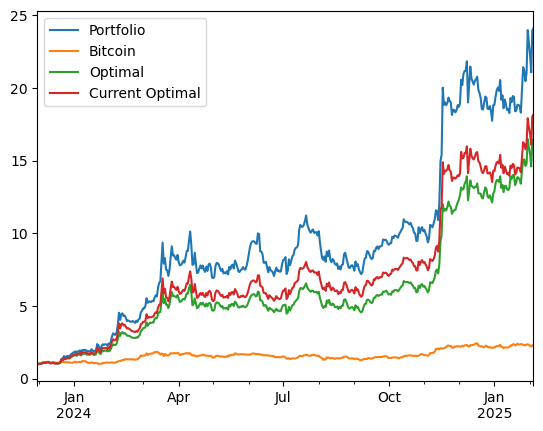

In [66]:
days=0
(1+portfolio_perf.iloc[-days:]).cumprod().plot()

In [67]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

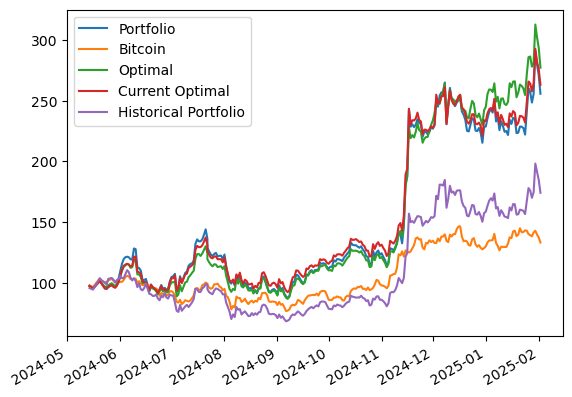

In [68]:
days=0
((1+current_perf.iloc[-days:]).cumprod()*100).plot()

In [69]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-24,222.088248,143.102976,254.695007,231.963590,156.577799
2025-01-25,241.503646,142.934147,271.698614,249.274406,167.492235
2025-01-26,260.099796,140.002047,285.809980,265.786250,177.981837
2025-01-27,257.306010,139.267274,286.403182,264.138269,175.966487
2025-01-28,248.451060,138.244001,278.018342,257.794792,169.963707
2025-01-29,255.379384,141.476921,280.962973,264.381130,174.562610
2025-01-30,290.969792,142.820328,312.764271,292.752029,198.187203
2025-01-31,279.960981,139.657879,302.163229,281.973507,191.324410
2025-02-01,270.892901,137.190295,293.608903,276.089851,184.686080
2025-02-02,255.706447,133.129604,277.203597,263.084666,174.094032


## Volatilities

In [71]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.676417
 dtype: float64,
 0.6771772320617596)

In [72]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.725421
 dtype: float64,
 0.7254207851253045)

In [73]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.831590
Bitcoin            0.426742
Optimal            0.677177
Current Optimal    0.728044
dtype: float64

In [74]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4625248535368612

In [75]:
days=120
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

2.6040560179633045

In [76]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.8857037554718128

## Risk Contribution

In [78]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,0.029239,0.023284,0.001508,0.006715,0.000258,0.006457
BTCUSDT,0.391582,0.300000,0.019856,0.109838,0.035741,0.074097
DEXEUSDT,0.161524,0.065912,0.006530,0.038582,0.008137,0.030445
OMUSDT,32.877934,0.441437,0.956620,0.759102,0.656140,0.102962
PEPEUSDT,0.008873,0.004823,0.000393,0.003369,0.000079,0.003290
RAYUSDT,0.054814,0.012976,0.001946,0.010926,0.000499,0.010427
SUIUSDT,0.073504,0.039274,0.003238,0.021291,0.003060,0.018231
XRPUSDT,0.232829,0.112294,0.009909,0.050177,0.012545,0.037632


In [79]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.135835,0.518453,0.790795,0.822823,0.731337,0.091486
BTCUSDT,0.189860,0.393335,0.173752,0.138226,0.062832,0.075394
TRXUSDT,0.030785,0.088212,0.035453,0.038951,0.013267,0.025684


In [80]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.455133,0.595960,0.860630,0.827502,0.734089,0.093413
BTCUSDT,0.092638,0.191919,0.080266,0.056650,0.011363,0.045286
SOLUSDT,0.013510,0.080808,0.026605,0.042649,0.005519,0.037130
JASMYUSDT,-0.016470,0.070707,0.015299,0.052986,0.011739,0.041247
ETHUSDT,-0.006678,0.040404,0.009513,0.013775,0.000922,0.012852
TRXUSDT,0.007050,0.020202,0.007687,0.006439,0.000529,0.005910


# Value At Risk

## Historical

### Optimal Weights

In [84]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.051257530974893696, -0.07746423141435621)

### Current Weights

In [86]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.051489857287601956, -0.07605571861312788)

In [87]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [88]:
var=historical_var.iloc[row]
var

OMUSDT      -0.032173
BTCUSDT     -0.004268
SOLUSDT     -0.005809
JASMYUSDT   -0.007805
ETHUSDT     -0.001546
TRXUSDT     -0.000247
BBUSDT      -0.000000
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.051848
Name: 2024-10-25 00:00:00, dtype: float64

In [89]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.058380
BTCUSDT     -0.005071
SOLUSDT     -0.004344
JASMYUSDT   -0.005875
ETHUSDT     -0.001735
TRXUSDT     -0.000651
BBUSDT       0.000000
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.076056
dtype: float64

## Parametric

### Optimal Weights

In [92]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.07016642251973114, -0.0899339537289007)

### Current Weights

In [94]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.07516522839777791, -0.09634104077127621)

## Multivariate

### Optimal Weights

In [97]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.0640427410219689, -0.08174613682376144)

### Current Weights

In [99]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06976553782573118, -0.08951741709723306)

In [100]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.058498
BTCUSDT     -0.003166
SOLUSDT     -0.003019
JASMYUSDT   -0.003791
ETHUSDT     -0.000963
TRXUSDT     -0.000348
Portfolio   -0.069785
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [104]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06367908533399541, -0.08176542166703867)

### Current Weights

In [106]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06997845886312827, -0.08953056043781446)

In [107]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.057966
BTCUSDT     -0.004007
SOLUSDT     -0.002562
JASMYUSDT   -0.003929
ETHUSDT     -0.000909
TRXUSDT     -0.000361
Portfolio   -0.069735
dtype: float64

## Student Copula

### Optimal Weights

In [110]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06256786604513427, -0.0813833304190671)

### Current Weights

In [112]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07211967166208062, -0.0920806571905317)

In [113]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.056388
BTCUSDT     -0.005111
SOLUSDT     -0.003817
JASMYUSDT   -0.004097
ETHUSDT     -0.001299
TRXUSDT     -0.000536
Portfolio   -0.071249
dtype: float64

## Gumbel Copula

### Optimal Weights

In [116]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.12360063301657868, -0.17571968730262014)

### Current Weights

In [118]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.14081433116135822, -0.20311635434005126)

In [119]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.135775
BTCUSDT     -0.000162
SOLUSDT     -0.000960
JASMYUSDT   -0.002263
ETHUSDT     -0.000347
TRXUSDT      0.000139
Portfolio   -0.139368
dtype: float64

## Monte Carlo

### Optimal

In [122]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [123]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07174865461316743, -0.08978002564639977)

### Current Weights

In [125]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07677830490238358, -0.09564173255301428)

In [126]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.065764
BTCUSDT     -0.003751
SOLUSDT     -0.002414
JASMYUSDT   -0.003586
ETHUSDT     -0.000867
TRXUSDT     -0.000418
Portfolio   -0.076801
dtype: float64

## VaR Violation

In [128]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.059102,-0.105530,-0.087850,-0.020865
2024-01-15,-0.059102,-0.105528,-0.088629,0.015879
2024-01-16,-0.059102,-0.105535,-0.083735,0.049929
2024-01-17,-0.059102,-0.107439,-0.091312,-0.030655
2024-01-18,-0.059102,-0.109801,-0.097270,-0.037516
...,...,...,...,...
2025-01-31,-0.054893,-0.084044,-0.078358,-0.033895
2025-02-01,-0.054893,-0.083876,-0.078945,-0.028310
2025-02-02,-0.056802,-0.087666,-0.087040,-0.055875
2025-02-03,-0.056802,-0.101350,-0.094827,0.122826


In [129]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.040820,-0.083888,-0.081911,-0.015732
2024-05-29,-0.040820,-0.081630,-0.075619,-0.007473
2024-05-30,-0.040820,-0.071369,-0.071168,0.029441
2024-05-31,-0.040820,-0.074306,-0.070527,0.044566
2024-06-01,-0.040820,-0.079473,-0.071208,0.060448
...,...,...,...,...
2025-01-31,-0.048859,-0.120632,-0.107438,-0.037835
2025-02-01,-0.048859,-0.123649,-0.116773,-0.032391
2025-02-02,-0.055304,-0.129832,-0.124582,-0.056061
2025-02-03,-0.053509,-0.145669,-0.126151,0.137246


<Axes: >

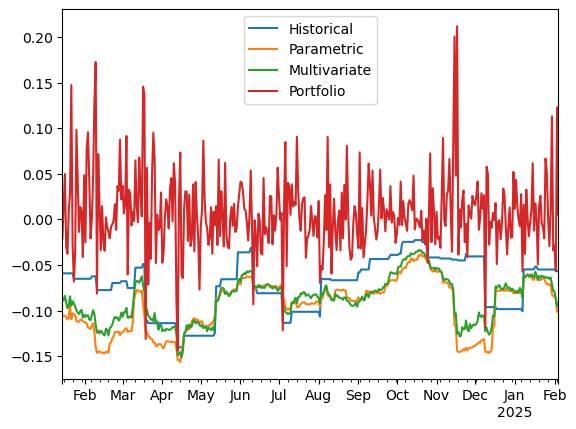

In [130]:
var_data.plot()

<Axes: >

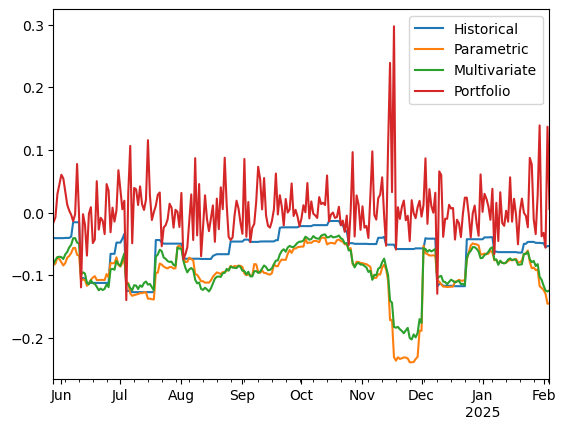

In [131]:
current_var_data.plot()

In [132]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.025773,0.010309,0.010309
Kupiec Stat,5.783946,18.8028,18.8028
P-value,0.016173,0.000014,0.000014


In [133]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.059289,0.01581,0.011858
Kupiec Stat,0.434842,8.396735,11.048092
P-value,0.509623,0.003759,0.000888


# Principal Component Analysis

## Historical PCA

In [136]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.78192018, 0.06878498, 0.05849245, 0.05042011, 0.04038228])

In [137]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT    0.016213
ADAUSDT     0.016120
ALGOUSDT    0.018533
APTUSDT     0.016809
ARBUSDT     0.017950
              ...   
WBTCUSDT    0.009216
WLDUSDT     0.022669
XLMUSDT     0.013337
XRPUSDT     0.011534
XTZUSDT     0.016674
Name: PC1, Length: 61, dtype: float64

<Axes: >

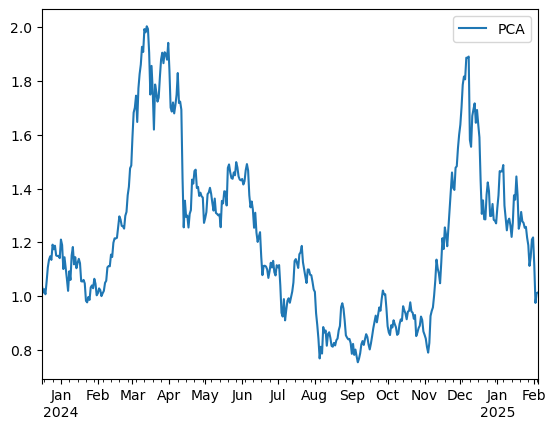

In [138]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

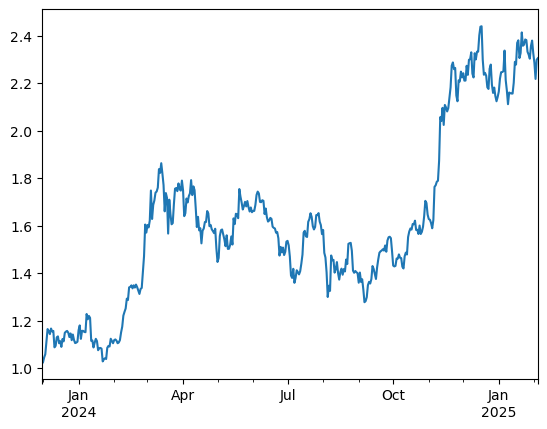

In [139]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [140]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
WBETHUSDT    0.439285
ETHUSDT      0.439605
ATOMUSDT     0.464566
DOTUSDT      0.466206
ETCUSDT      0.469097
NEXOUSDT     0.474394
ADAUSDT      0.506773
WBTCUSDT     0.522260
BTCUSDT      0.522850
EOSUSDT      0.528903
AVAXUSDT     0.529751
IOTAUSDT     0.555731
FILUSDT      0.563758
ARBUSDT      0.570593
GRTUSDT      0.580967
XTZUSDT      0.587324
LINKUSDT     0.597751
SOLUSDT      0.602566
IMXUSDT      0.607448
dtype: float64

<Axes: >

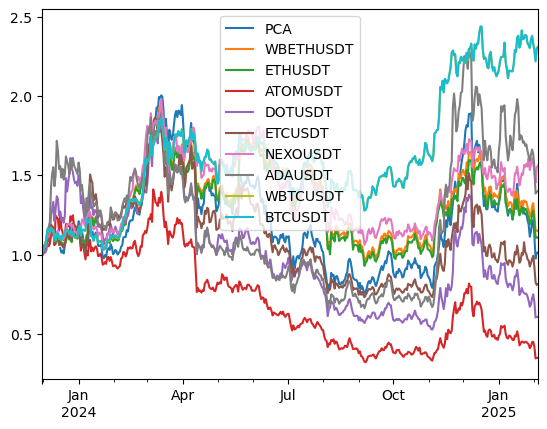

In [141]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

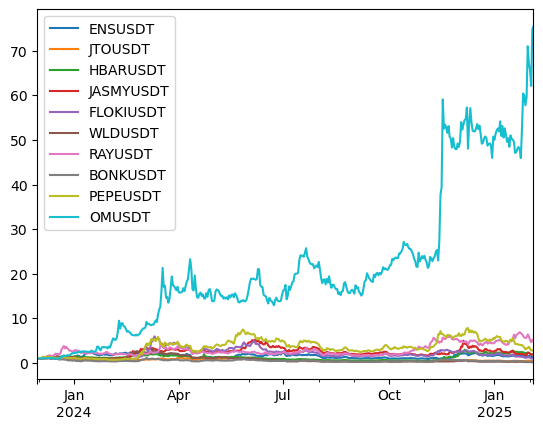

In [142]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [144]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.56620153, 0.1480732 , 0.11932998, 0.0955201 , 0.07087519])

In [145]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.096103
BTCUSDT      0.059191
SOLUSDT      0.097677
JASMYUSDT    0.175617
ETHUSDT      0.084340
TRXUSDT      0.056231
BBUSDT       0.206578
BNBUSDT      0.064784
PEPEUSDT     0.159478
Name: PC1, dtype: float64

<Axes: >

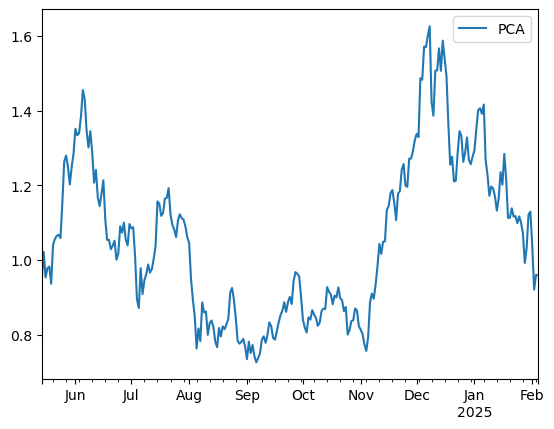

In [146]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

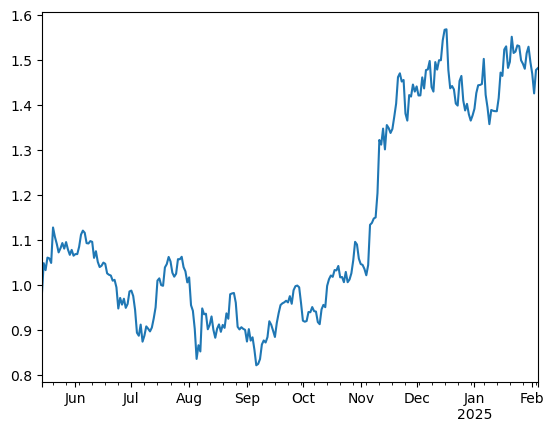

In [147]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [148]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
ETHUSDT      0.433033
BNBUSDT      0.466297
BTCUSDT      0.487957
SOLUSDT      0.490499
JASMYUSDT    0.690619
PEPEUSDT     0.743764
BBUSDT       0.774841
TRXUSDT      0.899549
OMUSDT       0.972283
dtype: float64

<Axes: >

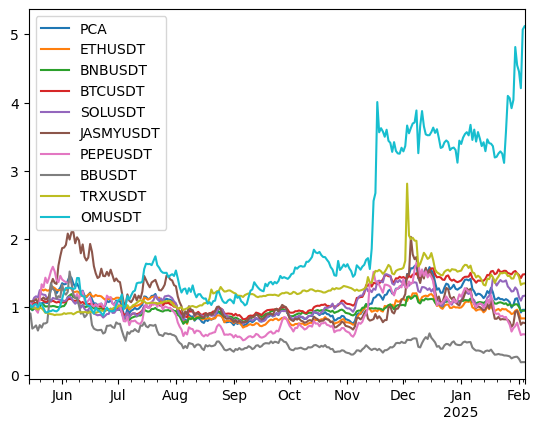

In [149]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [151]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.906313
BBUSDT       1.574740
JASMYUSDT    1.334115
SOLUSDT      1.164024
BTCUSDT      1.000000
ETHUSDT      0.971011
OMUSDT       0.891657
BNBUSDT      0.661362
TRXUSDT      0.327030
Name: BTCUSDT, dtype: float64

In [152]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.252958
PEPEUSDT     2.007478
BBUSDT       1.966912
SOLUSDT      1.375857
ETHUSDT      1.133025
OMUSDT       1.123790
TRXUSDT      1.047622
BTCUSDT      1.000000
BNBUSDT      0.651061
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [154]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [155]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
BTCUSDT,0.292095
BBUSDT,0.240753
TRXUSDT,0.198297
PEPEUSDT,0.161280
ETHUSDT,0.089335
BNBUSDT,0.087429
SOLUSDT,0.069004
JASMYUSDT,0.056026
OMUSDT,0.031127


### Regression to PCA

In [157]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-30:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

0.80524959334991

In [158]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.302777
BNBUSDT      1.195637
ETHUSDT      1.028658
PCA          1.000000
SOLUSDT      0.757067
JASMYUSDT    0.438195
PEPEUSDT     0.417290
BBUSDT       0.384265
TRXUSDT      0.262377
OMUSDT       0.243347
dtype: float64

In [159]:
reg=ex_ante_perf.copy().dropna().iloc[-30:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BNBUSDT      2.122124
BTCUSDT      1.709313
ETHUSDT      1.255650
TRXUSDT      1.207393
PCA          1.000000
BBUSDT       0.715778
PEPEUSDT     0.664883
JASMYUSDT    0.534865
SOLUSDT      0.496525
OMUSDT       0.323395
dtype: float64

### Correlation Matrix

<Axes: >

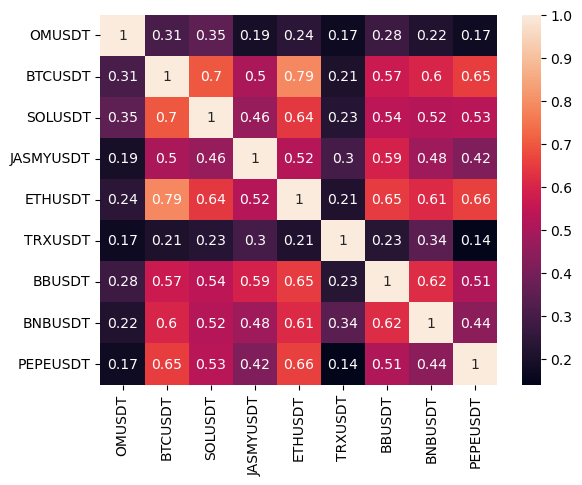

In [161]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

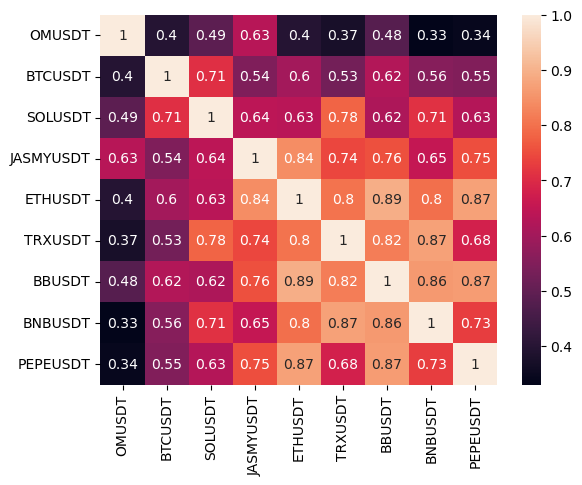

In [162]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [164]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,SOLUSDT,JASMYUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.000000,0.150852,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414562,0.112009,0.000000,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [165]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-06-29,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.961967,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-07-29,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.544875,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.145652,0.0
2024-08-28,0.928008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.071992,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-09-27,0.060666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-10-27,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.616773,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-11-26,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.124584,0.232829,0.0
2024-12-26,0.843853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2025-01-25,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.446224,0.0
2025-02-04,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [166]:
rolling_optimization.iloc[-1].sort_values(ascending=False)[:6]

OMUSDT      0.992454
AAVEUSDT    0.007546
LDOUSDT     0.000000
LTCUSDT     0.000000
MKRUSDT     0.000000
NEARUSDT    0.000000
Name: 2025-02-04 00:00:00, dtype: float64